In [2]:
pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install numpy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install opstrat


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3.13 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


VALUES INPUT

input the values for the variables here below
r= interest rate ,
S= underlying asset ,
K= strike price ,
T= time ,
sigma= volatility ,
type_option= Call (c) or Put (p)
tr_op= buyer (b) or seller (s)
op_pr= option premium


Option Price: 12.328
Delta: 0.697
Gamma: 0.017
Vega: 0.349
Theta: -0.011
Rho: 0.616


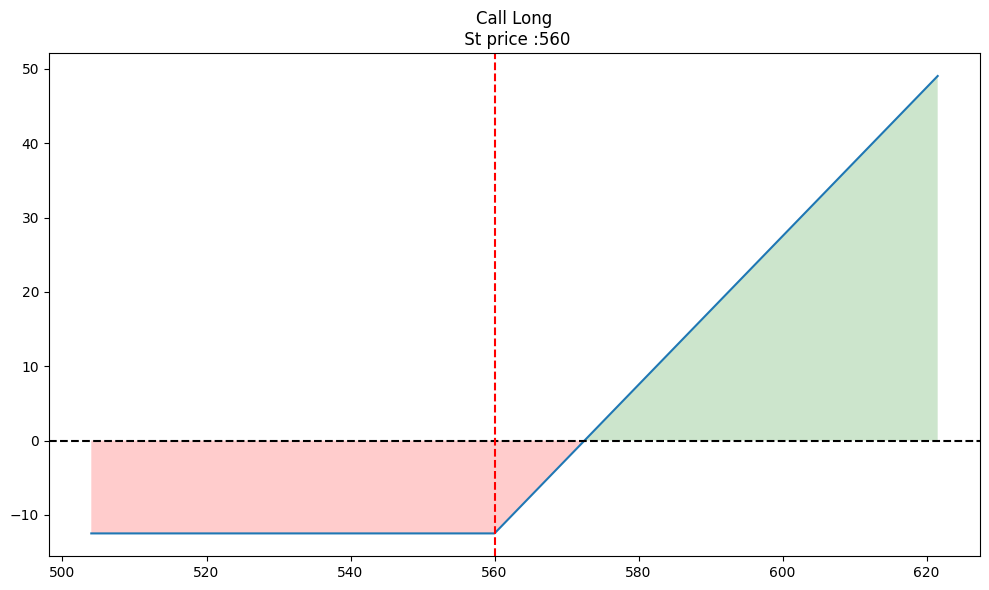

In [ ]:
import numpy as np
from scipy.stats import norm
import opstrat as op

class BlackScholesModel:
    def __init__(self, r, S, K, T, sigma, type_option="c"):
        self.r = r
        self.S = S
        self.K = K
        self.T = T
        self.sigma = sigma
        self.type_option = type_option

    def _d1(self):
        return (np.log(self.S / self.K) + (self.r + self.sigma**2 / 2) * self.T) / (self.sigma * np.sqrt(self.T))

    def _d2(self):
        return self._d1() - self.sigma * np.sqrt(self.T)

    def option_price(self):
        d1 = self._d1()
        d2 = self._d2()
        if self.type_option in ["c", "Call"]:
            price = self.S * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
        elif self.type_option in ["p", "Put"]:
            price = self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S * norm.cdf(-d1)
        else:
            raise ValueError("Please confirm option type (Call-c or Put-p)")
        return round(float(price), 3)

    def delta(self):
        d1 = self._d1()
        if self.type_option in ["c", "Call"]:
            return round(norm.cdf(d1), 3)
        elif self.type_option in ["p", "Put"]:
            return round(-norm.cdf(-d1), 3)
        else:
            raise ValueError("Please confirm option type (Call-c or Put-p)")

    def gamma(self):
        d1 = self._d1()
        return round(norm.pdf(d1) / (self.S * self.sigma * np.sqrt(self.T)), 3)

    def vega(self):
        d1 = self._d1()
        return round(self.S * norm.pdf(d1) * np.sqrt(self.T) * 0.01, 3)

    def theta(self):
        d1 = self._d1()
        d2 = self._d2()
        if self.type_option in ["c", "Call"]:
            return round((-self.S * norm.pdf(d1) * self.sigma / (2 * np.sqrt(self.T)) - 
                          self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(d2)) / 365, 3)
        elif self.type_option in ["p", "Put"]:
            return round((-self.S * norm.pdf(d1) * self.sigma / (2 * np.sqrt(self.T)) + 
                          self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(-d2)) / 365, 3)
        else:
            raise ValueError("Please confirm option type (Call-c or Put-p)")

    def rho(self):
        d2 = self._d2()
        if self.type_option in ["c", "Call"]:
            return round(self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(d2) * 0.01, 3)
        elif self.type_option in ["p", "Put"]:
            return round(-self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(-d2) * 0.01, 3)
        else:
            raise ValueError("Please confirm option type (Call-c or Put-p)")
    
    def graph(self):
        op.single_plotter(spot=560,strike=560,op_type="c",tr_type="b",op_pr=12.5) 
        
class OptionPlotter:
    def __init__(self, spot, strike, op_type, tr_type, op_pr):
        self.spot = spot
        self.strike = strike
        self.op_type = op_type
        self.tr_type = tr_type
        self.op_pr = op_pr

    def plot(self):
        # Using the single_plotter function from the opstrat module
        op.single_plotter(spot=self.spot, strike=self.strike, op_type=self.op_type, 
                          tr_type=self.tr_type, op_pr=self.op_pr)

# Example usage
bs_model = BlackScholesModel(r=0.02, S=90.83, K=85.0, T=441/365, sigma=0.2046, type_option="c")
print("Option Price:", bs_model.option_price())
print("Delta:", bs_model.delta())
print("Gamma:", bs_model.gamma())
print("Vega:", bs_model.vega())
print("Theta:", bs_model.theta())
print("Rho:", bs_model.rho())

plotter = OptionPlotter(spot=90.83, strike=85.0, op_type="c", tr_type="b", op_pr=12.5)
plotter.plot()